# 🧪 ÉPREUVE TYPE – Entraînement n°2 (niveau avancé)

## Q1 – Analyse de séries temporelles
Un tableau `conso` représente la consommation d'électricité quotidienne (en kWh) sur 30 jours :
```python
conso = np.random.randint(220, 360, size=30)
```
1. Calcule la moyenne mobile sur 5 jours (débuter à l’indice 4).
2. Identifie les jours où la consommation dépasse de 15% la moyenne mobile.

---


In [349]:
import numpy as np

conso = np.random.randint(220, 360, size=30)
#1
moy_mob = np.array([conso[i:i+5].mean() for i in range(0,len(conso)-5+1)])
# print("Moyenne mobile sur 5 jours :")
# print(moy_mob)
#2
jours = np.where(conso[4:] > moy_mob * 1.15)[0]
# print("Jours où la consommation dépasse 15% de la moyenne mobile : ",len(jours))


## Q2 – Graphique à deux courbes
Sur les mêmes données `conso` :
- Trace une courbe de la consommation journalière.
- Trace la moyenne mobile sur le même graphe.
- Ajoute une zone colorée en rouge quand la consommation dépasse la moyenne mobile.

---


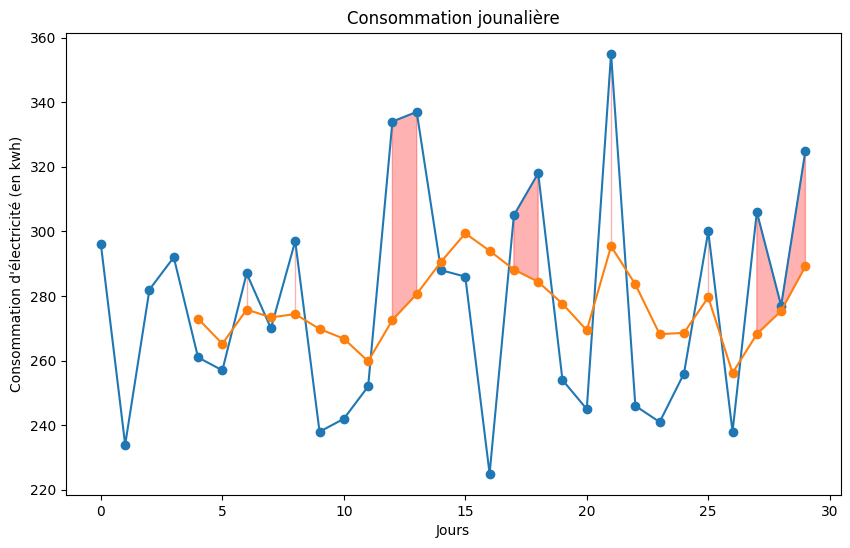

In [356]:
import matplotlib.pyplot as plt

conso_cut = conso[4:]

plt.figure(figsize=(10,6))
plt.plot(conso, marker="o")
plt.plot(np.arange(4,30), moy_mob, marker="o")
plt.fill_between(range(4, 30), conso_cut, moy_mob, where=conso_cut > moy_mob, color='red', alpha=0.3)
plt.title("Consommation jounalière")
plt.xlabel("Jours")
plt.ylabel("Consommation d'électricité (en kwh)")
plt.show()


## Q3 – Jeu aléatoire avec arrêt conditionnel
Simule un jeu où un joueur lance un dé jusqu’à atteindre un score > `seuil` :
- À chaque lancer, ajoute la valeur au score total.
- Arrête dès que la somme dépasse `seuil` (par exemple 100).
- Retourne : nombre de lancers, score final, liste des lancers.

---


In [351]:
def simulation(seuil):
    univers = np.random.choice([1,2,3,4,5,6], 1)
    count = 1
    while univers.sum() < seuil:
        univers = np.append(univers, np.random.choice([1,2,3,4,5,6], 1))
        count += 1
    
    return count, univers.sum(), univers

count, som, uni = simulation(100)
print("Nombre de lancers : ",count)
print("Score final : ",som)
print("Liste des lancers : ",uni)

Nombre de lancers :  27
Score final :  102
Liste des lancers :  [2 6 1 6 5 3 1 6 5 5 3 1 3 6 6 2 6 3 1 3 1 4 5 5 6 1 6]



## Q4 – Échantillonnage et histogramme
Génère un échantillon de 5000 valeurs selon une loi normale de moyenne 100 et écart-type 15 :
```python
echantillon = np.random.normal(100, 15, 5000)
```
1. Affiche un histogramme avec 30 classes.
2. Calcule le pourcentage des valeurs entre 85 et 115.

---


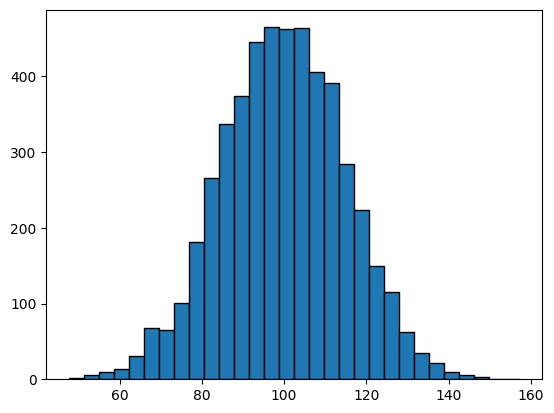

In [352]:
echantillon = np.random.normal(100, 15, 5000)

#1
plt.hist(echantillon,bins=30, edgecolor="black")
plt.show()

In [353]:
freq = np.array([(echantillon>85)&(echantillon<115)]).mean()*100
print("Pourcentage des valeurs entre 85 et 115 : ",freq, "%")

Pourcentage des valeurs entre 85 et 115 :  68.14 %



## Q5 – Classement de performance
Un tableau `scores` contient les notes de 20 étudiants :
```python
scores = np.random.randint(12, 31, size=20)
```
1. Classe les scores du plus grand au plus petit.
2. Calcule la part cumulative en % (courbe de Lorenz simplifiée).
3. Identifie le nombre minimum d’étudiants qui forment le top 50% des points totaux.

In [354]:
scores = np.random.randint(12,31, 20)

#1
scores_sort = np.sort(scores)[::-1]
# print("Classement des scores du plus grand au plus petit:")
# print(scores_sort)
#2
freq_cum = np.cumsum(scores_sort/scores_sort.sum()*100)
# print("\nProportion cumulative en %:")
# print(freq_cum)

#3
tot = scores.sum()
max_scores = scores[scores > tot*.5]
max_scores

array([], dtype=int32)